<a href="https://colab.research.google.com/github/Phennnn/Machine-Learning/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [29]:
df = pd.read_excel('/content/personality_datasheet.csv.xlsx')

In [30]:
df.head()

,Name,Posts/Share Frequently,Active,Replies to commments/messgaes,Number of Friends/Followers,Personality
0,Zayx,1,1,1,1300,1
1,Chris,1,1,1,1800,1
2,Jason,1,1,1,850,1
3,Kae,1,1,1,2200,1
4,Bjorn,1,1,1,1100,1


Display the summary of all the features of the dataset using `.info()`

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Name                           99 non-null     object
 1   Posts/Share Frequently         99 non-null     int64 
 2   Active                         99 non-null     int64 
 3   Replies to commments/messgaes  99 non-null     int64 
 4   Number of Friends/Followers    99 non-null     int64 
 5   Personality                    99 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


Display the total number of samples from each label using `.value_counts()`

In [32]:
df.value_counts()

,,,,,,count
Name,Posts/Share Frequently,Active,Replies to commments/messgaes,Number of Friends/Followers,Personality,
Ainz,1,1,1,4100,1,1
Alex,0,1,1,3800,1,1
Allan,1,1,1,679,1,1
Amir,1,1,1,2100,1,1
Amor,0,0,0,813,0,1
...,...,...,...,...,...,...
Xian,1,1,1,2700,1,1
Yen,1,1,0,122,1,1
Yumieh,1,1,1,183,1,1


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

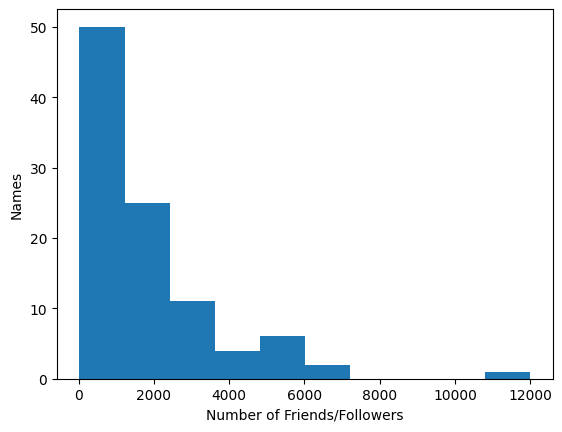

In [33]:
plt.hist(df["Number of Friends/Followers"])
plt.xlabel("Number of Friends/Followers")
plt.ylabel("Names")
plt.show()

Remove the name column using `drop()` method

In [35]:
df.drop(columns='Name', inplace=True)

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [37]:
X = df.drop(columns=['Personality']).values

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [38]:
y = df['Personality'].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Display the dimensions of each variables using `.shape()`

In [43]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(79, 4)
(79,)
(20, 4)
(20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [44]:
knn = KNeighborsClassifier(n_neighbors=13)

Train the model using the `.fit()`

In [45]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

Test the model using the `.predict()`

In [46]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

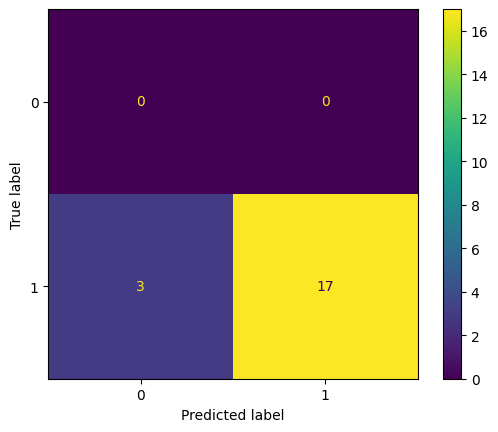

In [47]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [50]:
metrics.accuracy_score(y_test, y_pred)

0.85

Display the precision

In [53]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.   0.85]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Display the recall

In [54]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0. 1.]


Display the f1-score

In [56]:
f1 = f1_score(y_test, y_pred, average=None)
print("F1-score:", f1)

F1-score: [0.         0.91891892]


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [57]:
knn.predict([[6, 3, 4, 2]])

array([1])